In [118]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np


data: https://www.kaggle.com/datasets/aadimator/nyc-weather-2016-to-2022/data

In [119]:
data = pd.read_csv("NYC_Weather_2016_2022.csv")     # data from 2016-01-01 to 2022-10-25

crash_data = pd.read_csv("data_crash_dates.csv")

In [120]:
data

,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
0,2016-01-01T00:00,7.6,0.0,0.0,69.0,53.0,0.0,72.0,10.0,296.0
1,2016-01-01T01:00,7.5,0.0,0.0,20.0,4.0,0.0,56.0,9.8,287.0
2,2016-01-01T02:00,7.1,0.0,0.0,32.0,3.0,0.0,99.0,9.7,285.0
3,2016-01-01T03:00,6.6,0.0,0.0,35.0,5.0,0.0,100.0,9.2,281.0
4,2016-01-01T04:00,6.3,0.0,0.0,34.0,4.0,0.0,100.0,9.1,279.0
...,...,...,...,...,...,...,...,...,...,...
59755,2022-10-25T19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59756,2022-10-25T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59757,2022-10-25T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59758,2022-10-25T22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
crash_data

,CRASH DATE,CRASH TIME,LOCATION,NUMBER OF PERSONS KILLED
0,09/11/2021,2:39,NaN,0.0
1,03/26/2022,11:45,NaN,0.0
2,06/29/2022,6:55,NaN,0.0
3,09/11/2021,9:35,"(40.667202, -73.8665)",0.0
4,12/14/2021,8:13,"(40.683304, -73.917274)",0.0
...,...,...,...,...
2128239,08/06/2024,20:39,NaN,0.0
2128240,08/06/2024,12:00,NaN,0.0
2128241,07/29/2024,2:30,"(40.723442, -73.93899)",0.0
2128242,08/02/2024,15:48,NaN,0.0


In [122]:
data["time"] = pd.to_datetime(data["time"])
crash_data["CRASH DATE"] = pd.to_datetime(crash_data["CRASH DATE"] + " " + crash_data["CRASH TIME"])

In [123]:
dates_with_rain = data[data["rain (mm)"] > 0]["time"].dt.date
dates_without_rain = data[data["rain (mm)"] == 0]["time"].dt.date

In [124]:
crashes_with_rain = crash_data[crash_data["CRASH DATE"].isin(dates_with_rain)]
crashes_without_rain = crash_data[crash_data["CRASH DATE"].isin(dates_without_rain)]

C:\Users\William\AppData\Local\Temp\ipykernel_43440\1555086535.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  crashes_with_rain = crash_data[crash_data["CRASH DATE"].isin(dates_with_rain)]
C:\Users\William\AppData\Local\Temp\ipykernel_43440\1555086535.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  crashes_without_rain = crash_data[crash_data["CRASH DATE"].isin(dates_without_rain)]


In [148]:
crashes_with_rain

,CRASH DATE,CRASH TIME,LOCATION,NUMBER OF PERSONS KILLED
90,2021-12-09,0:00,"(40.7448, -73.953415)",0.0
175,2022-03-25,0:00,"(40.85713, -73.8808)",0.0
443,2021-07-09,0:00,"(40.654343, -73.864204)",0.0
584,2021-04-15,0:00,"(40.7357, -73.90377)",0.0
659,2021-04-15,0:00,"(40.780437, -73.94989)",0.0
...,...,...,...,...
1952900,2022-10-14,0:00,"(40.891445, -73.897415)",0.0
1970989,2022-09-26,0:00,"(40.827152, -73.946205)",0.0
1993862,2022-09-12,0:00,"(40.821636, -73.93909)",0.0
2051329,2022-06-24,0:00,NaN,0.0


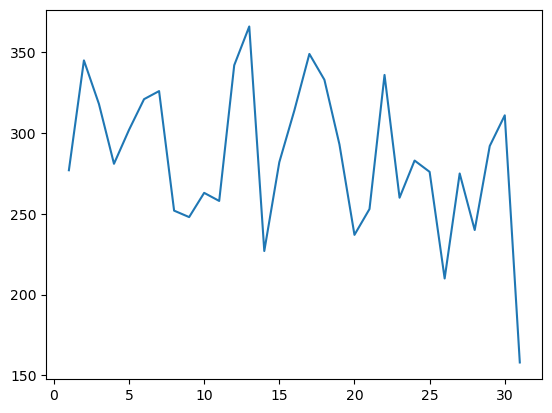

In [164]:

day_data_crashes = crashes_with_rain.groupby(crashes_with_rain["CRASH DATE"].dt.day).count()
plt.plot(day_data_crashes.index, day_data_crashes["CRASH DATE"])


<BarContainer object of 24 artists>

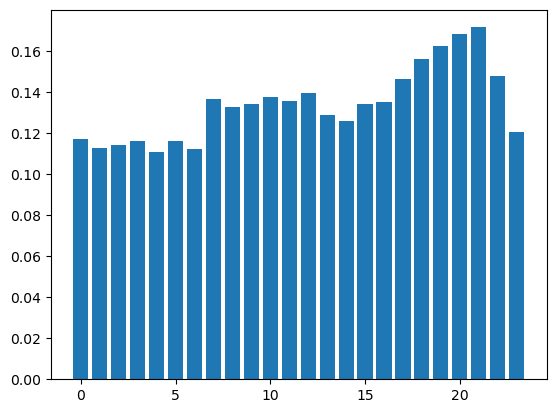

In [128]:
# make normal curve of the data by time of day for all data

h_data = data.groupby(data["time"].dt.hour).mean()
plt.bar(h_data.index, h_data["precipitation (mm)"], label="precipitation")
